## heading 2
**Bold Text**

### Heading 3

**_Bold and Italic Text_ Text_**

## Suspicious Dataset
The data is stored in 20 CSV files located in the 'susData' directory. These files contain information about around 500,000 suspicious user accounts. To manage the large dataset, we utilize a chunk approach, reading the first 50,000 rows of each file. From these chunks, we randomly select 5,000 rows from each file and combine them into a single dataframe for analysis.


In [1]:
import pandas as pd
import os

# Directory containing the files
directory = 'susData/'

# Initialize an empty list to store DataFrames from each file
dfs = []

# Iterate over files in the directory
for filename in os.listdir(directory):
    if filename.startswith("user_cropped_") and filename.endswith(".csv"):
        file_path = os.path.join(directory, filename)
        
        # Use a chunk-based approach to read the file
        chunk_size = 50000  # Adjust this size based on the average file size and available memory
        for chunk in pd.read_csv(file_path, chunksize=chunk_size):
            # Sample 50 rows from the chunk (or the entire chunk if it's smaller than 50 rows)
            if len(chunk) >= 5000:
                sampled_df = chunk.sample(n=5000, random_state=1)
                dfs.append(sampled_df)
                break  # We only need one batch of 5000 rows per file, so break after sampling
            else:
                dfs.append(chunk)

# Concatenate all sampled DataFrames into a single DataFrame
df = pd.concat(dfs, ignore_index=True)

# Display the combined DataFrame
print(df)


               login        id          type           created_at  \
0          atifzamir  13260668          User  2015-07-09 19:08:08   
1                tqs   3242862          User  2013-01-11 09:00:57   
2        robertbulb3   2755608          User  2012-11-09 02:38:15   
3        joaovictor3  11023843          User  2015-02-16 03:51:39   
4            abook23   8414205          User  2014-08-11 07:40:43   
...              ...       ...           ...                  ...   
99995    kndsjbfgruf  34593148          User  2017-12-16 05:58:05   
99996  MitchDeKoning  12637327          User  2015-05-28 04:40:15   
99997  renzalegre123  22195286          User  2016-09-14 12:22:42   
99998  michaelbilcot   2457050          User  2012-09-30 12:13:59   
99999   CognitiveJHB  20650757  Organization  2016-07-25 22:05:58   

                updated_at  is_suspicious  followers  following  commits  \
0      2016-02-28 07:16:00          False          0          0      1.0   
1      2015-04-07 2

In [2]:
# Comparing characteristics of suspicious vs non-suspicious account

Average Suspicious 
Followers: 0.016793244964385112, Following: 0.02835039388650408


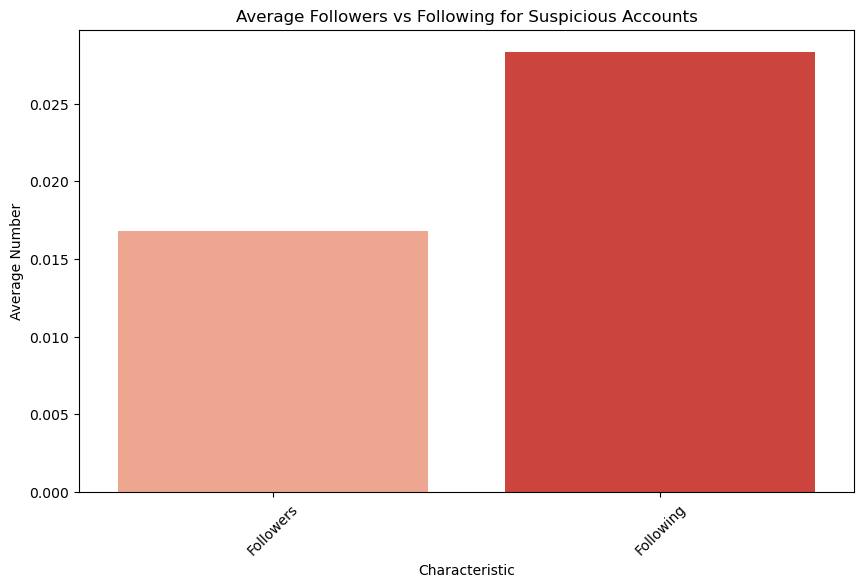

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

#selecting the entries that are classified as suspicious
suspicious = df[df['is_suspicious'] == True]

# Calculate the average number of followers and following for suspicious accounts
avg_followers_suspicious = suspicious['followers'].mean()
avg_following_suspicious = suspicious['following'].mean()

print(f"Average Suspicious \nFollowers: {avg_followers_suspicious}, Following: {avg_following_suspicious}") #display averages

#Plotting comparative bargraph
plt.figure(figsize=(10, 6))
sns.barplot(x=['Followers', 'Following'], y=[avg_followers_suspicious, avg_following_suspicious], palette='Reds')
plt.title('Average Followers vs Following for Suspicious Accounts')
plt.ylabel('Average Number')
plt.xlabel('Characteristic')
plt.xticks(rotation=45)
plt.show()

In [4]:
#grouping by 'is_suspicious' column and then counting the number of non-zero followers
suspicious_accounts_grouped = df[df['followers'] > 0].groupby('is_suspicious').size()

#finding suspicious accounts with a follower count greater than 0
num_suspicious_accounts_with_followers = suspicious_accounts_grouped.get(True, 0)

print(f"Number of suspicious accounts with followers greater than 0: {num_suspicious_accounts_with_followers}") #display


Number of suspicious accounts with followers greater than 0: 258


In [5]:

#grouping by 'is_suspicious' and counting the number of non-zero followers
suspicious_accounts_grouped = df[df['following'] > 0].groupby('is_suspicious').size()

#finding suspicious accounts with a following count greater than 0
num_suspicious_accounts_with_followers = suspicious_accounts_grouped.get(True, 0)

print(f"Number of suspicious accounts with following greater than 0: {num_suspicious_accounts_with_followers}") #display


Number of suspicious accounts with following greater than 0: 220


Number of suspicious accounts found:  21199
Number of non-suspicious accounts found:  78801


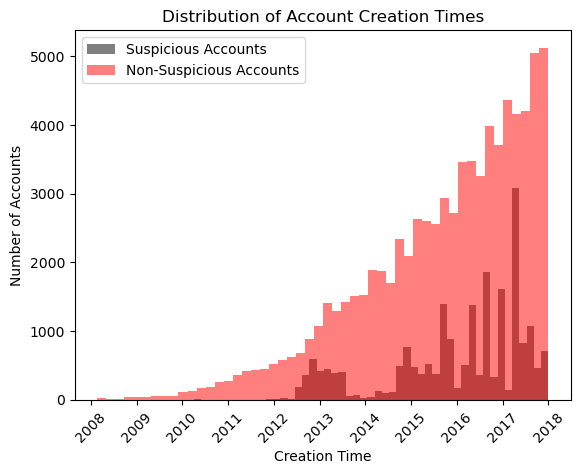

In [6]:
#converting 'created_at' column to datetime
df['created_at'] = pd.to_datetime(df['created_at'])

#selecting the suspicious accounts and the non suspicious accounts
suspicious_accounts = df[df['is_suspicious'] == True]
non_suspicious_accounts = df[df['is_suspicious'] == False]

print("Number of suspicious accounts found: ", len(suspicious_accounts))
print("Number of non-suspicious accounts found: ", len(non_suspicious_accounts))

#plot histogram for suspicious accounts
plt.hist(suspicious_accounts['created_at'], bins=50, alpha=0.5, label='Suspicious Accounts', color='black')

#plot histogram for non-suspicious accounts
plt.hist(non_suspicious_accounts['created_at'], bins=50, alpha=0.5, label='Non-Suspicious Accounts', color='red')

plt.xlabel('Creation Time')
plt.ylabel('Number of Accounts')
plt.title('Distribution of Account Creation Times')
plt.legend()
plt.xticks(rotation=45)
plt.show()


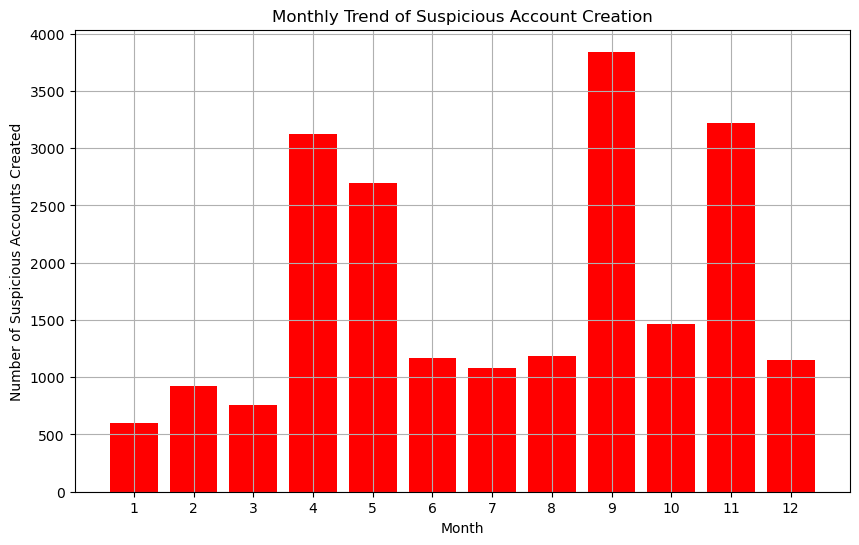

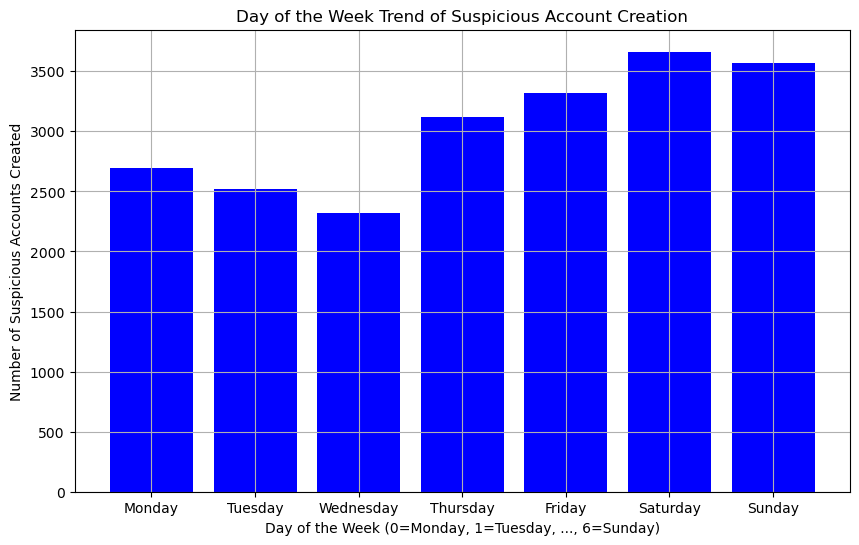

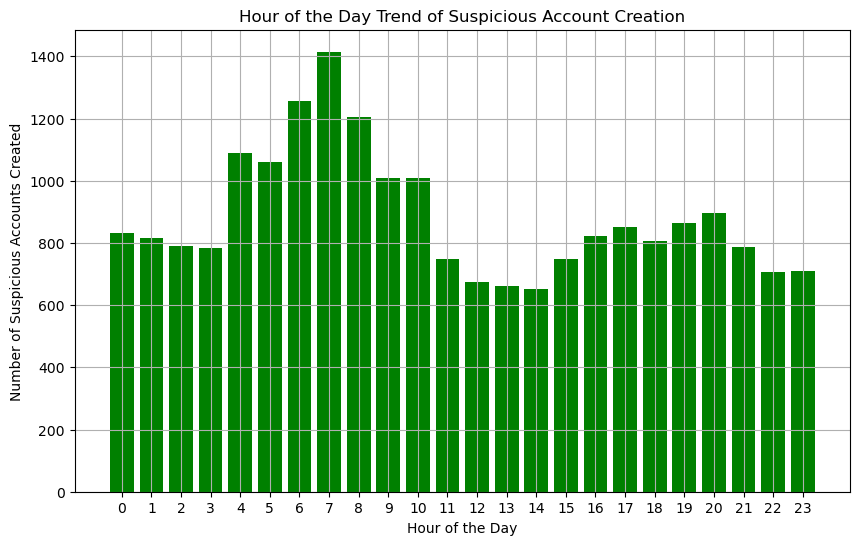

In [7]:
#getting the month, day, and hour separated
df['month'] = df['created_at'].dt.month
df['day_of_week'] = df['created_at'].dt.dayofweek
df['hour_of_day'] = df['created_at'].dt.hour

#grouping by month and counting number of suspicious accounts created in each month
monthly_counts = df[df['is_suspicious'] == True].groupby('month').size()

#grouping by day and counting number of suspicious accounts created on each day
day_of_week_counts = df[df['is_suspicious'] == True].groupby('day_of_week').size()

#grouping by hour and counting number of suspicious accounts created in each hour
hour_of_day_counts = df[df['is_suspicious'] == True].groupby('hour_of_day').size()

#plot bar graph for month
plt.figure(figsize=(10, 6))
plt.bar(monthly_counts.index, monthly_counts.values, color='red')
plt.title('Monthly Trend of Suspicious Account Creation')
plt.xlabel('Month')
plt.ylabel('Number of Suspicious Accounts Created')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

#plot bar graph for day
plt.figure(figsize=(10, 6))
plt.bar(day_of_week_counts.index, day_of_week_counts.values, color='blue')
plt.title('Day of the Week Trend of Suspicious Account Creation')
plt.xlabel('Day of the Week (0=Monday, 1=Tuesday, ..., 6=Sunday)')
plt.ylabel('Number of Suspicious Accounts Created')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid(True)
plt.show()

#plot bar graph for hour
plt.figure(figsize=(10, 6))
plt.bar(hour_of_day_counts.index, hour_of_day_counts.values, color='green')
plt.title('Hour of the Day Trend of Suspicious Account Creation')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Suspicious Accounts Created')
plt.xticks(range(24))
plt.grid(True)
plt.show()


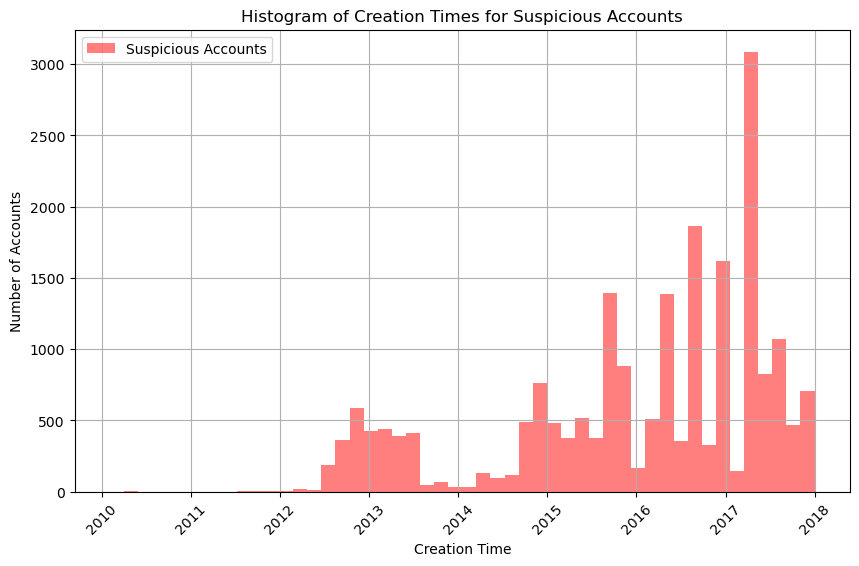

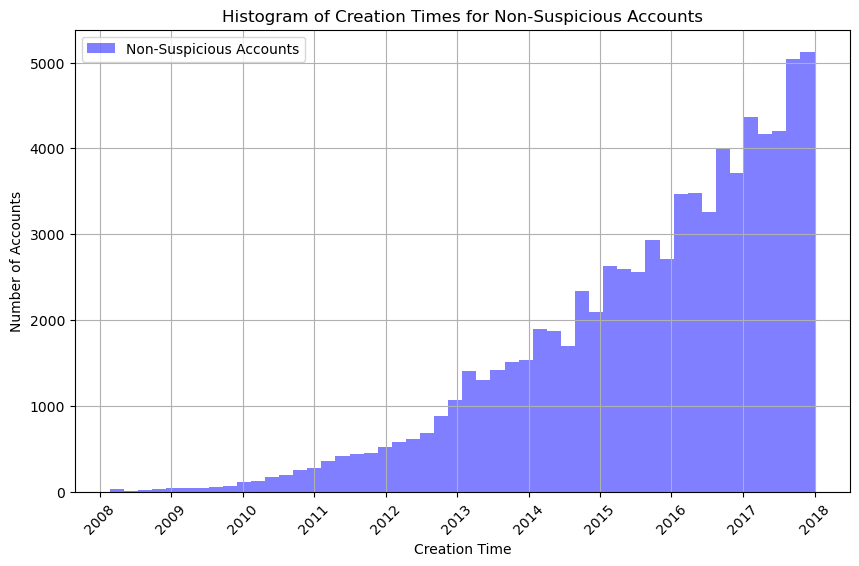

In [9]:
#Plotting separate histograms for the creation times of suspicious accounts vs. non-suspicious accounts

#plot histogram for suspicious accounts
plt.figure(figsize=(10, 6))
plt.hist(suspicious_accounts['created_at'], bins=50, color='red', alpha=0.5, label='Suspicious Accounts')
plt.title('Histogram of Creation Times for Suspicious Accounts')
plt.xlabel('Creation Time')
plt.ylabel('Number of Accounts')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

#plot histogram for non-suspicious accounts
plt.figure(figsize=(10, 6))
plt.hist(non_suspicious_accounts['created_at'], bins=50, color='blue', alpha=0.5, label='Non-Suspicious Accounts')
plt.title('Histogram of Creation Times for Non-Suspicious Accounts')
plt.xlabel('Creation Time')
plt.ylabel('Number of Accounts')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


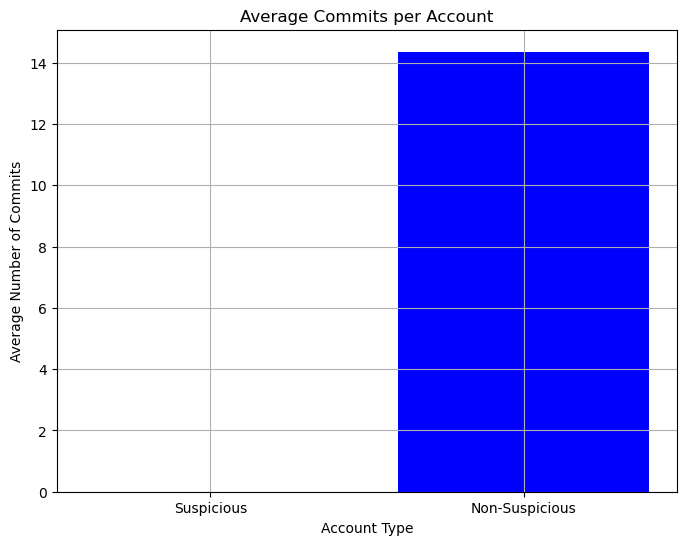

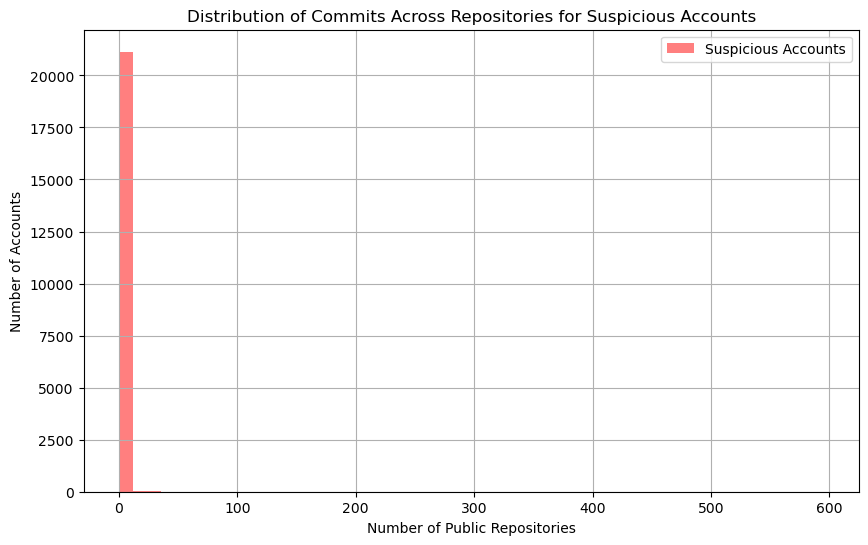

In [10]:
#comparing commits for suspicious and non-suspicious accounts

#calculate total number of commits for suspicious and non-suspicious accounts
total_commits_suspicious = suspicious_accounts['commits'].sum()
total_commits_non_suspicious = non_suspicious_accounts['commits'].sum()

#calculate average number of commits per account for suspicious and non-suspicious accounts
avg_commits_per_account_suspicious = total_commits_suspicious / len(suspicious_accounts)
avg_commits_per_account_non_suspicious = total_commits_non_suspicious / len(non_suspicious_accounts)

#plot bar chart for average commits per account
plt.figure(figsize=(8, 6))
plt.bar(['Suspicious', 'Non-Suspicious'], [avg_commits_per_account_suspicious, avg_commits_per_account_non_suspicious], color=['red', 'blue'])
plt.title('Average Commits per Account')
plt.xlabel('Account Type')
plt.ylabel('Average Number of Commits')
plt.grid(True)
plt.show()

#plot histogram showing distribution of commits across different repositories for suspicious accounts
plt.figure(figsize=(10, 6))
plt.hist(suspicious_accounts['public_repos'], bins=50, color='red', alpha=0.5, label='Suspicious Accounts')
plt.title('Distribution of Commits Across Repositories for Suspicious Accounts')
plt.xlabel('Number of Public Repositories')
plt.ylabel('Number of Accounts')
plt.legend()
plt.grid(True)
plt.show()

In [11]:

# Calculate the total number of commits for suspicious accounts
total_commits_suspicious = df[df['is_suspicious'] == True]['commits'].sum()

# Calculate the total number of commits for non-suspicious accounts
total_commits_non_suspicious = df[df['is_suspicious'] == False]['commits'].sum()

print(f"Total number of commits for suspicious accounts: {total_commits_suspicious}")
print(f"Total number of commits for non-suspicious accounts: {total_commits_non_suspicious}")

Total number of commits for suspicious accounts: 0.0
Total number of commits for non-suspicious accounts: 1131526.0


Average activity duration for suspicious accounts: 237.83239775461107 days
Average activity duration for non-suspicious accounts: 562.4613773936879 days


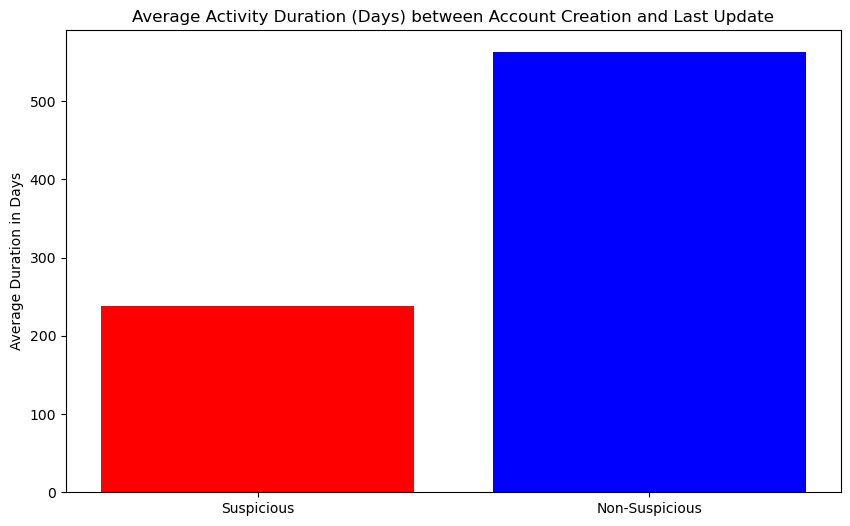

In [21]:
#converting 'updated_at' column to datetime
df['updated_at'] = pd.to_datetime(df['updated_at'])

#calculating the time difference in days between 'updated_at' and 'created_at'
df['activity_duration'] = (df['updated_at'] - df['created_at']).dt.days

#calculating the average activity duration for suspicious and non-suspicious accounts 
#suspicious_accounts & non_suspicious_accounts dataframes created earlier
avg_activity_duration_suspicious = suspicious_accounts['activity_duration'].mean()
avg_activity_duration_non_suspicious = non_suspicious_accounts['activity_duration'].mean()

#printing the average activity duration
print(f"Average activity duration for suspicious accounts: {avg_activity_duration_suspicious} days")
print(f"Average activity duration for non-suspicious accounts: {avg_activity_duration_non_suspicious} days")

plt.figure(figsize=(10, 6))
plt.bar(['Suspicious', 'Non-Suspicious'], [avg_activity_duration_suspicious, avg_activity_duration_non_suspicious], color=['red', 'blue'])
plt.title('Average Activity Duration (Days) between Account Creation and Last Update')
plt.ylabel('Average Duration in Days')
plt.show() #display

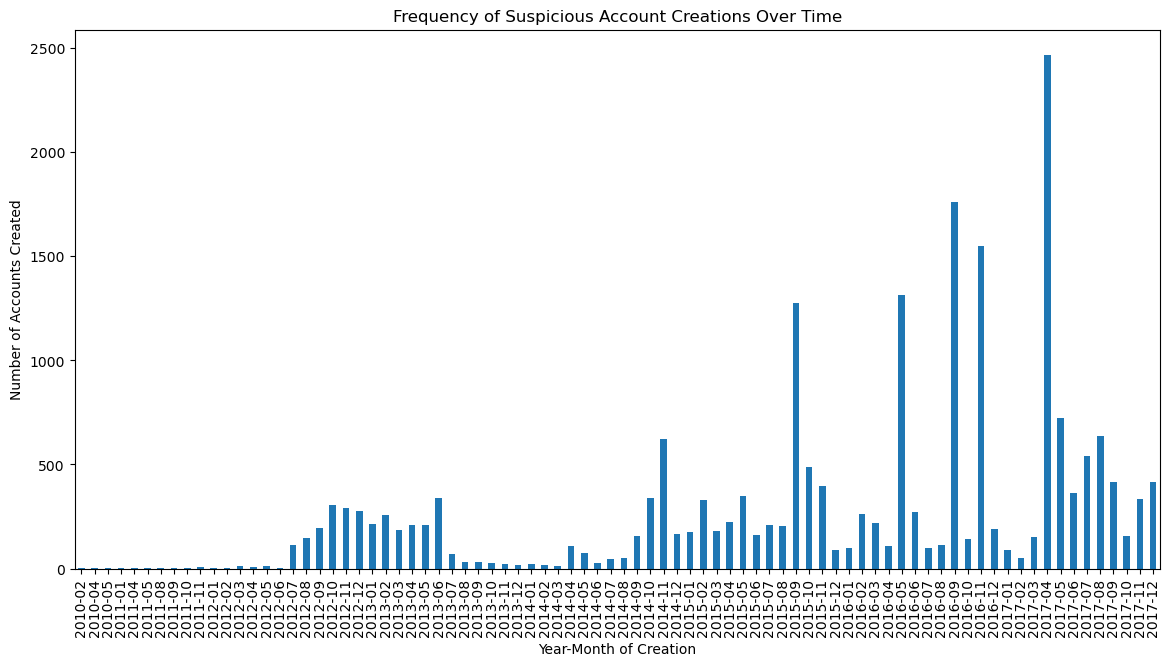

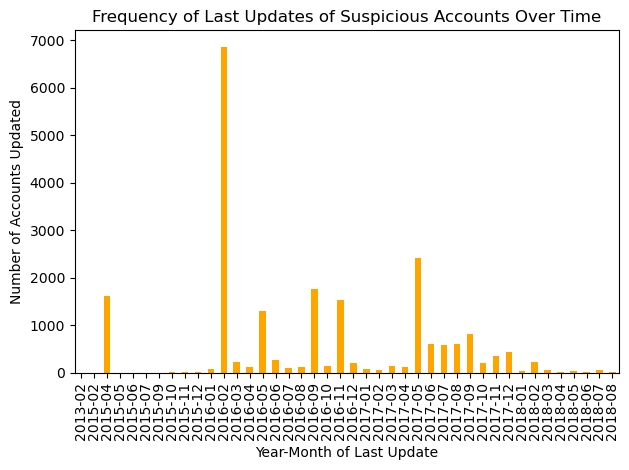

In [23]:
#getting year and month for creation and update
df['created_year_month'] = df['created_at'].dt.to_period('M')
df['updated_year_month'] = df['updated_at'].dt.to_period('M')

#filter suspicious accounts
suspicious_df = df[df['is_suspicious']]

#finding frequency of account creation
creation_counts = suspicious_df['created_year_month'].value_counts().sort_index()
update_counts = suspicious_df['updated_year_month'].value_counts().sort_index()

plt.figure(figsize=(14, 7))

#plot bar graph for creation dates
creation_counts.plot(kind='bar')
plt.title('Frequency of Suspicious Account Creations Over Time')
plt.xlabel('Year-Month of Creation')
plt.ylabel('Number of Accounts Created')
plt.show()

#plot bar graph update dates
update_counts.plot(kind='bar', color='orange')
plt.title('Frequency of Last Updates of Suspicious Accounts Over Time')
plt.xlabel('Year-Month of Last Update')
plt.ylabel('Number of Accounts Updated')

plt.tight_layout()
plt.show()

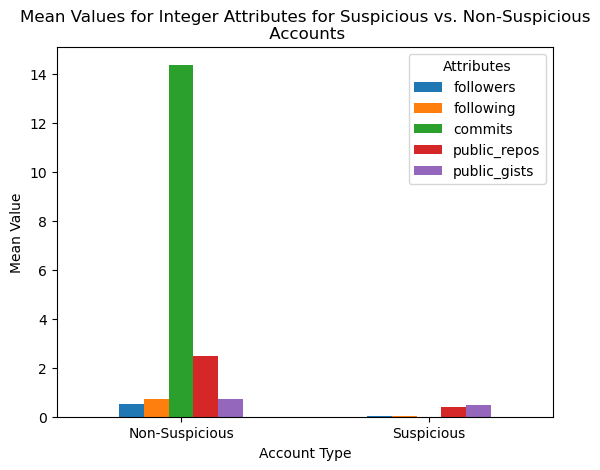

In [14]:
#grouping data by 'is_suspicious'
grouped = df.groupby('is_suspicious')

#computing average values for each of the specified columns 
mean_values = grouped.agg({
    'followers': 'mean',
    'following': 'mean',
    'commits': 'mean',
    'public_repos': 'mean',
    'public_gists': 'mean'
})

#plot the bar chart to compare suspicious and non-suspicious activity
mean_values.plot(kind='bar')
plt.title('Mean Values for Integer Attributes for Suspicious vs. Non-Suspicious\n Accounts')
plt.xlabel('Account Type')
plt.ylabel('Mean Value')
plt.xticks([0, 1], ['Non-Suspicious', 'Suspicious'], rotation=0)
plt.legend(title='Attributes')
plt.show()


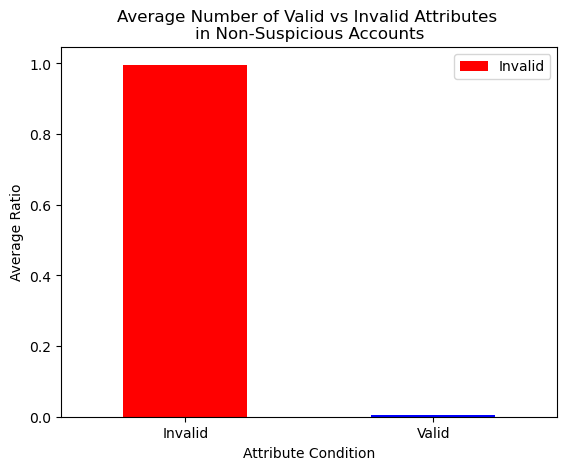

In [24]:
#making mask to filter non-suspicious accounts where all string attributes are not null, not NaN, and not empty
mask_valid_attributes_non_suspicious = ~df[df['is_suspicious'] == False][['location', 'company', 'email', 'bio', 'blog']].isnull().any(axis=1) & ~df[df['is_suspicious'] == 0][['location', 'company', 'email', 'bio', 'blog']].eq('').any(axis=1)

#using mask to filter dataframe
filtered_non_suspicious_valid_df = df[df['is_suspicious'] == False][mask_valid_attributes_non_suspicious]

#counting non-suspicious accounts where all attributes are not null, not NaN, and not empty
count_non_suspicious_valid_attributes = len(filtered_non_suspicious_valid_df)

#total number of non-suspicious accounts
total_non_suspicious_accounts = len(df[df['is_suspicious'] == False])

#calculating averages 
average_valid = count_non_suspicious_valid_attributes / total_non_suspicious_accounts
average_invalid = 1 - average_valid

#make dataframe for the averages
average_df = pd.DataFrame({
    'Average': [average_invalid, average_valid],
    'Condition': ['Invalid', 'Valid']
})

#plot bar graph to compare valid and invalid accounts
ax = average_df.plot(kind='bar', x='Condition', y='Average', color=['red', 'blue'])
plt.title('Average Number of Valid vs Invalid Attributes \nin Non-Suspicious Accounts')
plt.xlabel('Attribute Condition')
plt.ylabel('Average Ratio')
legend_labels = ['Invalid', 'Valid']
plt.legend(legend_labels, loc='upper right')
plt.xticks(rotation=0)
plt.show()


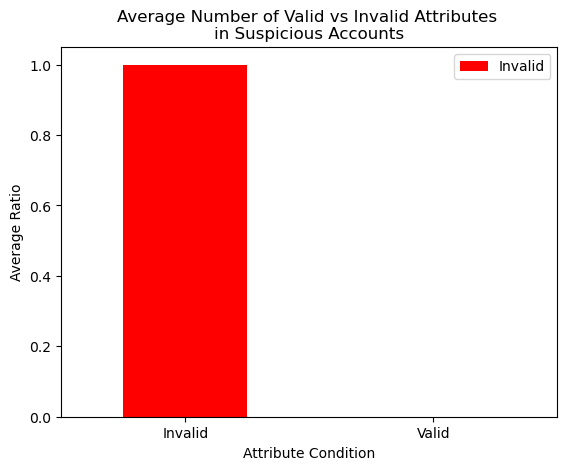

In [19]:
#making mask to filter suspicious accounts where all string attributes are not null, not NaN, and not empty
mask_valid_attributes_suspicious = ~df[df['is_suspicious'] == 1][['location', 'company', 'email', 'bio', 'blog']].isnull().any(axis=1) & ~df[df['is_suspicious'] == 1][['location', 'company', 'email', 'bio', 'blog']].eq('').any(axis=1)

#using mask to filter dataframe
filtered_suspicious_valid_df = df[df['is_suspicious'] == 1][mask_valid_attributes_suspicious]

#counting non-suspicious accounts where all attributes are not null, not NaN, and not empty
count_suspicious_valid_attributes = len(filtered_suspicious_valid_df)

#total number of non-suspicious accounts
total_suspicious_accounts = len(df[df['is_suspicious'] == 1])

#calculating averages 
average_valid = count_suspicious_valid_attributes / total_suspicious_accounts
average_invalid = 1 - average_valid

#make dataframe for the averages
average_df = pd.DataFrame({
    'Average': [average_invalid, average_valid],
    'Condition': ['Invalid', 'Valid']
})

#plot bar graph to compare valid and invalid accounts
ax = average_df.plot(kind='bar', x='Condition', y='Average', color=['red', 'blue'])
plt.title('Average Number of Valid vs Invalid Attributes \nin Suspicious Accounts')
plt.xlabel('Attribute Condition')
plt.ylabel('Average Ratio')
legend_labels = ['Invalid', 'Valid']
plt.legend(legend_labels, loc='upper right')
plt.xticks(rotation=0)
plt.show()